In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
def toReal(x):
    if np.iscomplexobj(x):
        return float(np.real(x))


def matrix2real(matrix):
    return np.vectorize(toReal)(matrix)

In [3]:
x = np.arange(0, 5.01, 0.01)  # 501
t = np.arange(0, 5.01, 0.1)  # 51
N = len(t)
Fs = 1 / (t[1] - t[0])
X, T = np.meshgrid(x, t)

In [4]:
Utx = 1.2 * np.exp(- 0.5 * T) * np.sin(2 * np.pi * (X + 0 * T)) + 0.8 * np.exp(0.3 * T) * np.sin(2 * np.pi * (3 * X + 4 * T))
np.size(Utx, 0), np.size(Utx, 1)
# 原始信号

(51, 501)

In [5]:
Utx

array([[ 0.00000000e+00,  2.25253675e-01,  4.44899522e-01, ...,
        -4.44899522e-01, -2.25253675e-01, -1.00930704e-14],
       [ 4.84548783e-01,  4.22670789e-01,  3.48075689e-01, ...,
         5.52968440e-01,  5.29261394e-01,  4.84548783e-01],
       [-8.07893253e-01, -6.76217313e-01, -5.18439857e-01, ...,
        -9.83880443e-01, -9.10949172e-01, -8.07893253e-01],
       ...,
       [ 3.21129621e+00,  3.35676697e+00,  3.38353776e+00, ...,
         2.58803765e+00,  2.95206368e+00,  3.21129621e+00],
       [-2.04513302e+00, -2.52986267e+00, -2.92476600e+00, ...,
        -8.78267182e-01, -1.48795351e+00, -2.04513302e+00],
       [-1.75631558e-14,  6.78012823e-01,  1.33220140e+00, ...,
        -1.33220140e+00, -6.78012823e-01, -5.63316056e-14]])

In [6]:
Uxt = Utx.T 
np.size(Uxt, 0), np.size(Uxt, 1)
# 时间 * 空间的矩阵

(501, 51)

In [7]:
Uxt[:, :50]

array([[ 0.00000000e+00,  4.84548783e-01, -8.07893253e-01, ...,
        -3.11638806e+00,  3.21129621e+00, -2.04513302e+00],
       [ 2.25253675e-01,  4.22670789e-01, -6.76217313e-01, ...,
        -2.86426453e+00,  3.35676697e+00, -2.52986267e+00],
       [ 4.44899522e-01,  3.48075689e-01, -5.18439857e-01, ...,
        -2.51044679e+00,  3.38353776e+00, -2.92476600e+00],
       ...,
       [-4.44899522e-01,  5.52968440e-01, -9.83880443e-01, ...,
        -3.28464189e+00,  2.58803765e+00, -8.78267182e-01],
       [-2.25253675e-01,  5.29261394e-01, -9.10949172e-01, ...,
        -3.25811199e+00,  2.95206368e+00, -1.48795351e+00],
       [-1.00930704e-14,  4.84548783e-01, -8.07893253e-01, ...,
        -3.11638806e+00,  3.21129621e+00, -2.04513302e+00]])

In [8]:
Up = scipy.linalg.pinv(Uxt[:, :50])
np.size(Up, 0), np.size(Up, 1)
# 求解X的伪逆矩阵

(50, 501)

In [9]:
Up

array([[-1.64001058e-06,  2.44711200e-05,  5.03453049e-05, ...,
        -5.33949915e-05, -2.76930430e-05, -1.64001058e-06],
       [ 1.99336123e-05,  3.31307962e-05,  4.57556969e-05, ...,
        -8.68808896e-06,  6.03027024e-06,  1.99336123e-05],
       [-3.24436776e-05, -1.15822184e-05,  1.02606784e-05, ...,
        -7.05914155e-05, -5.21558034e-05, -3.24436776e-05],
       ...,
       [-1.24241640e-04, -1.11227753e-04, -9.42136685e-05, ...,
        -1.36820242e-04, -1.32854204e-04, -1.24241640e-04],
       [ 1.24394049e-04,  1.31019640e-04,  1.33057911e-04, ...,
         9.82594135e-05,  1.13361737e-04,  1.24394049e-04],
       [-7.55697468e-05, -9.37030784e-05, -1.08456873e-04, ...,
        -3.20690742e-05, -5.47593192e-05, -7.55697468e-05]])

In [10]:
A = Uxt[:, 1:51] @ Up
np.size(A, 0), np.size(A, 1)

(501, 501)

In [11]:
A

array([[-0.00332134, -0.00280853, -0.00219623, ..., -0.00397997,
        -0.00371648, -0.00332134],
       [-0.00371467, -0.00330502, -0.00277782, ..., -0.00412981,
        -0.00399273, -0.00371467],
       [-0.00397642, -0.00368396, -0.00326006, ..., -0.0041343 ,
        -0.004128  , -0.00397642],
       ...,
       [-0.00219978, -0.00153864, -0.00082394, ..., -0.00326667,
        -0.00278299, -0.00219978],
       [-0.00281034, -0.00221254, -0.00153683, ..., -0.00368914,
        -0.00330858, -0.00281034],
       [-0.00332134, -0.00280853, -0.00219623, ..., -0.00397997,
        -0.00371648, -0.00332134]])

In [12]:
D, V = np.linalg.eig(A)
D

array([-8.33655230e-01+6.05685978e-01j, -8.33655230e-01-6.05685978e-01j,
        9.51229425e-01+0.00000000e+00j, -4.57540833e-17+6.43149870e-17j,
       -4.57540833e-17-6.43149870e-17j,  6.47164188e-17+2.42245613e-17j,
        6.47164188e-17-2.42245613e-17j,  2.47015868e-17+6.41822853e-17j,
        2.47015868e-17-6.41822853e-17j, -6.96960348e-17+0.00000000e+00j,
       -5.90892095e-18+6.78900580e-17j, -5.90892095e-18-6.78900580e-17j,
        5.23519066e-17+3.76489165e-17j,  5.23519066e-17-3.76489165e-17j,
       -1.69431467e-18+6.13770463e-17j, -1.69431467e-18-6.13770463e-17j,
       -2.84392381e-17+5.41778549e-17j, -2.84392381e-17-5.41778549e-17j,
        3.78343967e-17+4.51526110e-17j,  3.78343967e-17-4.51526110e-17j,
        5.69586834e-17+3.92340038e-18j,  5.69586834e-17-3.92340038e-18j,
       -5.50169748e-17+1.85954570e-17j, -5.50169748e-17-1.85954570e-17j,
       -5.23366568e-17+1.67195204e-17j, -5.23366568e-17-1.67195204e-17j,
        3.85046024e-17+3.03608197e-17j,  3.85046024

In [13]:
# Ds = np.diag(D)
ind = np.argsort(-np.abs(D)) # 对D降序排列
# ind = np.argsort(-D) 

In [14]:
ind

array([  0,   1,   2,   3,   4,   9,   5,   6,   7,   8,  10,  11,  13,
        12,  14,  15,  16,  17,  18,  19,  22,  23,  20,  21,  24,  25,
        28,  27,  26,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  46,  47,  42,  43,  44,  45,  48,  49,  50,  51,
        52,  53,  54,  55,  63,  62,  89,  88,  57,  56,  60,  61,  64,
        65,  58,  59,  87,  86,  67,  66,  68,  69,  92,  93,  70,  71,
        94,  95,  96,  97,  99,  98,  73,  72, 100, 101,  75,  74,  77,
        76,  83,  82, 111, 110,  79,  78, 107, 106,  81,  80, 102, 103,
        85,  84, 113, 112, 108, 109,  91,  90, 104, 105, 116, 117, 129,
       128, 114, 115, 124, 125, 120, 121, 127, 126, 119, 118, 130, 131,
       136, 137, 122, 123, 134, 135, 132, 133, 143, 142, 138, 139, 141,
       140, 152, 153, 150, 151, 148, 149, 146, 147, 144, 145, 154, 155,
       163, 162, 164, 165, 166, 167, 157, 156, 180, 179, 178, 173, 172,
       168, 169, 158, 159, 181, 182, 189, 190, 161, 160, 171, 17

In [15]:
# Ds = Ds[ind]
D = D[ind]
V = V[:, ind]

In [16]:
D

array([-8.33655230e-01+6.05685978e-01j, -8.33655230e-01-6.05685978e-01j,
        9.51229425e-01+0.00000000e+00j, -4.57540833e-17+6.43149870e-17j,
       -4.57540833e-17-6.43149870e-17j, -6.96960348e-17+0.00000000e+00j,
        6.47164188e-17+2.42245613e-17j,  6.47164188e-17-2.42245613e-17j,
        2.47015868e-17+6.41822853e-17j,  2.47015868e-17-6.41822853e-17j,
       -5.90892095e-18+6.78900580e-17j, -5.90892095e-18-6.78900580e-17j,
        5.23519066e-17-3.76489165e-17j,  5.23519066e-17+3.76489165e-17j,
       -1.69431467e-18+6.13770463e-17j, -1.69431467e-18-6.13770463e-17j,
       -2.84392381e-17+5.41778549e-17j, -2.84392381e-17-5.41778549e-17j,
        3.78343967e-17+4.51526110e-17j,  3.78343967e-17-4.51526110e-17j,
       -5.50169748e-17+1.85954570e-17j, -5.50169748e-17-1.85954570e-17j,
        5.69586834e-17+3.92340038e-18j,  5.69586834e-17-3.92340038e-18j,
       -5.23366568e-17+1.67195204e-17j, -5.23366568e-17-1.67195204e-17j,
       -4.91289647e-17+0.00000000e+00j,  3.85046024

In [17]:
np.argsort(-D) # 对D降序排列

array([  2,   6,   7,  22,  23,  13,  12,  28,  27,  18,  19,   8,   9,
        41,  37,  38,  33,  34,  74,  75,  59,  58,  83,  82, 120, 121,
       125, 124, 107, 106,  95,  94, 122, 123,  44,  45,  86,  87, 114,
       115, 181, 182, 190, 189, 193, 194,  80,  81, 144, 145, 184, 183,
       215,  78,  79, 211, 212, 140, 141, 239, 240, 242, 241, 217, 218,
       269, 270, 180, 179, 290, 289, 127, 126, 297, 298, 247, 248,  57,
        56, 188, 187, 274, 275, 118, 119,  99,  98, 258, 257, 322, 321,
       335, 169, 170, 279, 278, 340, 341, 244, 243, 313, 314, 348, 202,
       201, 326, 325, 225, 226, 354, 353, 186, 185, 381, 373, 374, 136,
       137,  35,  36, 392, 393, 371, 372, 329, 330, 295, 296, 351, 352,
       108, 109,  69,  68, 245, 246, 409, 379, 380, 264, 263, 362, 361,
       417, 416, 366, 365, 327, 328, 407, 408, 433, 432, 102, 103, 203,
       204, 148, 149, 323, 324, 426, 427, 451, 452, 448, 447, 221, 222,
       337, 336, 458, 459, 299, 300, 445, 446, 404, 403, 435, 43

In [18]:
np.argsort(-np.abs(D)) # 对D降序排列

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  15,  14,  16,  17,  18,  19,  20,  21,  23,  22,  24,  25,
        26,  27,  28,  30,  29,  32,  31,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  47,  46,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  61,  60,  63,  62,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        79,  78,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  93,  92,  95,  94,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 111, 110, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 125, 124, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 140, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 154,
       157, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 172, 171, 173, 174, 175, 176, 177, 178, 179, 18

In [19]:
# Dabs = np.abs(Ds) + np.ones((np.size(Ds, 0), np.size(Ds, 1)))
Dabs = np.abs(D)
# Dd = np.divide(D, Dabs)
Dd = D / Dabs


In [20]:
Dabs

array([1.03045453e+00, 1.03045453e+00, 9.51229425e-01, 7.89294222e-17,
       7.89294222e-17, 6.96960348e-17, 6.91016948e-17, 6.91016948e-17,
       6.87716085e-17, 6.87716085e-17, 6.81467191e-17, 6.81467191e-17,
       6.44838199e-17, 6.44838199e-17, 6.14004277e-17, 6.14004277e-17,
       6.11884811e-17, 6.11884811e-17, 5.89084022e-17, 5.89084022e-17,
       5.80745946e-17, 5.80745946e-17, 5.70936484e-17, 5.70936484e-17,
       5.49424063e-17, 5.49424063e-17, 4.91289647e-17, 4.90345162e-17,
       4.90345162e-17, 4.74822686e-17, 4.74822686e-17, 4.11950222e-17,
       4.11950222e-17, 3.08175188e-17, 3.08175188e-17, 2.77465557e-17,
       2.77465557e-17, 2.63111674e-17, 2.63111674e-17, 2.57382235e-17,
       2.57382235e-17, 2.45178695e-17, 2.33024588e-17, 2.33024588e-17,
       2.33000144e-17, 2.33000144e-17, 2.32817732e-17, 2.32817732e-17,
       2.27418025e-17, 2.27418025e-17, 2.20902261e-17, 2.20902261e-17,
       2.20442069e-17, 2.20442069e-17, 2.19601664e-17, 2.19601664e-17,
      

In [21]:
Dd

array([-0.80901699+0.58778525j, -0.80901699-0.58778525j,
        1.        +0.j        , -0.57968349+0.81484173j,
       -0.57968349-0.81484173j, -1.        +0.j        ,
        0.93653881+0.35056392j,  0.93653881-0.35056392j,
        0.35918291+0.93326718j,  0.35918291-0.93326718j,
       -0.08670881+0.9962337j , -0.08670881-0.9962337j ,
        0.81186112-0.58385059j,  0.81186112+0.58385059j,
       -0.02759451+0.9996192j , -0.02759451-0.9996192j ,
       -0.46478091+0.88542572j, -0.46478091-0.88542572j,
        0.64225807+0.76648847j,  0.64225807-0.76648847j,
       -0.94735013+0.32019951j, -0.94735013-0.32019951j,
        0.99763608+0.06871868j,  0.99763608-0.06871868j,
       -0.95257307+0.30430994j, -0.95257307-0.30430994j,
       -1.        +0.j        ,  0.78525507-0.61917241j,
        0.78525507+0.61917241j, -0.66111435+0.75028516j,
       -0.66111435-0.75028516j, -0.07069078+0.99749828j,
       -0.07069078-0.99749828j,  0.72160165+0.6923085j ,
        0.72160165-0.6923085j ,

In [22]:
# 频率
f = Fs * np.angle(Dd) / (2 * np.pi)
f

array([ 4.        , -4.        ,  0.        ,  3.48411901, -3.48411901,
        5.        ,  0.57005031, -0.57005031,  1.9152771 , -1.9152771 ,
        2.63817487, -2.63817487, -0.99227308,  0.99227308,  2.5439236 ,
       -2.5439236 ,  3.26933456, -3.26933456,  1.38998875, -1.38998875,
        4.48125025, -4.48125025,  0.10945544, -0.10945544,  4.50787075,
       -4.50787075,  5.        , -1.06265902,  1.06265902,  3.64958097,
       -3.64958097,  2.61260179, -2.61260179,  1.21703126, -1.21703126,
        2.03260397, -2.03260397,  0.70527542, -0.70527542,  3.17013624,
       -3.17013624,  0.        ,  4.6756306 , -4.6756306 ,  1.26316038,
       -1.26316038,  3.55264589, -3.55264589,  4.28635152, -4.28635152,
        4.61300109, -4.61300109,  2.66947729, -2.66947729,  2.29133108,
       -2.29133108, -1.63142893,  1.63142893, -0.66576516,  0.66576516,
       -3.20342753,  3.20342753,  3.35739031, -3.35739031,  2.52084109,
       -2.52084109,  3.06057407, -3.06057407, -1.95606284,  1.95

In [23]:
rValue = np.real(Dd[99::-1])
rValue

array([ 0.55740128,  0.55740128, -0.84677804, -0.84677804,  0.88708268,
        0.88708268, -0.64044791, -0.64044791, -0.74628365, -0.74628365,
       -0.89001288, -0.89001288,  0.81270584,  0.81270584, -0.88694138,
       -0.88694138,  0.97284286,  0.97284286,  0.76938426,  0.76938426,
        0.71156131,  0.71156131, -0.67501788, -0.67501788,  0.99013232,
        0.99013232, -0.80461303, -0.80461303, -0.99818464, -0.99818464,
        0.33515129,  0.33515129, -0.3449815 , -0.3449815 , -0.01309447,
       -0.01309447, -0.51303274, -0.51303274, -0.42772692, -0.42772692,
        0.9137757 ,  0.9137757 ,  0.51905014,  0.51905014,  0.13073524,
        0.13073524, -0.10628459, -0.10628459, -0.97058233, -0.97058233,
       -0.90114252, -0.90114252, -0.61421981, -0.61421981,  0.70123567,
        0.70123567, -0.97930308, -0.97930308,  1.        , -0.4087272 ,
       -0.4087272 ,  0.90341078,  0.90341078,  0.28947048,  0.28947048,
        0.72160165,  0.72160165, -0.07069078, -0.07069078, -0.66

In [24]:
iValue = np.imag(Dd[99::-1])
iValue

array([ 0.83024323, -0.83024323,  0.53194638, -0.53194638,  0.46161057,
       -0.46161057,  0.76800161, -0.76800161,  0.66562806, -0.66562806,
        0.45593539, -0.45593539, -0.5826742 ,  0.5826742 ,  0.46188201,
       -0.46188201,  0.23146658, -0.23146658, -0.63878624,  0.63878624,
       -0.70262401,  0.70262401, -0.73780137,  0.73780137, -0.14013559,
        0.14013559, -0.59379952,  0.59379952,  0.06022815, -0.06022815,
        0.94216432, -0.94216432, -0.93860948,  0.93860948, -0.99991426,
        0.99991426, -0.85836904,  0.85836904,  0.90390801, -0.90390801,
        0.40621911, -0.40621911,  0.85474379, -0.85474379, -0.99141732,
        0.99141732, -0.99433575,  0.99433575, -0.24076949,  0.24076949,
       -0.43352297,  0.43352297, -0.78913498,  0.78913498, -0.71292954,
        0.71292954, -0.2023993 ,  0.2023993 ,  0.        , -0.9126566 ,
        0.9126566 , -0.42877613,  0.42877613, -0.95718694,  0.95718694,
       -0.6923085 ,  0.6923085 , -0.99749828,  0.99749828, -0.75

In [25]:
colorMap = -np.abs(D[99::-1])
# 根据绝对值的负值上色
len(colorMap)         

100

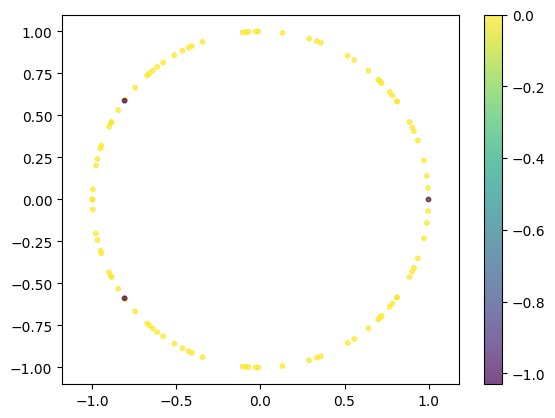

In [26]:
fig = plt.figure(1)
plt.scatter(rValue,
            iValue,
            s=10,
            c=colorMap,
            alpha=0.7)
plt.colorbar()
plt.axis('equal')
plt.show()

In [27]:
fig2 = plt.figure(2)
wa = np.log(D) * Fs # 利用特征根计算衰减率
wa

array([ 3.00000000e-01+25.13274123j,  3.00000000e-01-25.13274123j,
       -5.00000000e-01 +0.j        , -3.70779776e+02+21.89136538j,
       -3.70779776e+02-21.89136538j, -3.72023882e+02+31.41592654j,
       -3.72109524e+02 +3.58173172j, -3.72109524e+02 -3.58173172j,
       -3.72157407e+02+12.03404091j, -3.72157407e+02-12.03404091j,
       -3.72248687e+02+16.57614159j, -3.72248687e+02-16.57614159j,
       -3.72801173e+02 -6.23463567j, -3.72801173e+02 +6.23463567j,
       -3.73291149e+02+15.98394339j, -3.73291149e+02-15.98394339j,
       -3.73325727e+02+20.54183484j, -3.73325727e+02-20.54183484j,
       -3.73705479e+02 +8.73355691j, -3.73705479e+02 -8.73355691j,
       -3.73848034e+02+28.15652571j, -3.73848034e+02-28.15652571j,
       -3.74018388e+02 +0.68772884j, -3.74018388e+02 -0.68772884j,
       -3.74402462e+02+28.32378724j, -3.74402462e+02-28.32378724j,
       -3.75520829e+02+31.41592654j, -3.75540072e+02 -6.67688356j,
       -3.75540072e+02 +6.67688356j, -3.75861753e+02+22.930993

<Figure size 640x480 with 0 Axes>

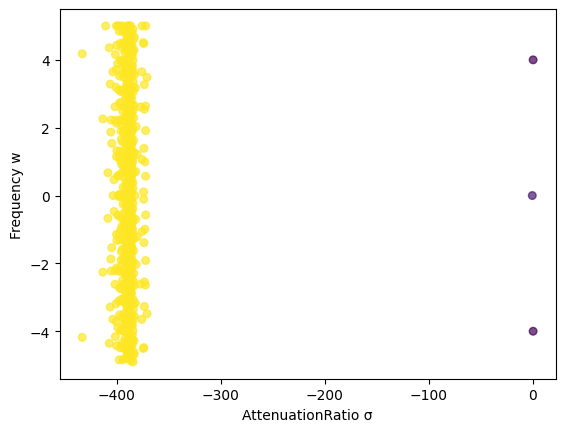

In [30]:
plt.scatter(np.real(wa) ,
            np.imag(wa) / 2 / np.pi ,
            30,
            -Dabs,
            alpha=0.7)
plt.xlabel('AttenuationRatio σ')
plt.ylabel('Frequency w')
plt.show()

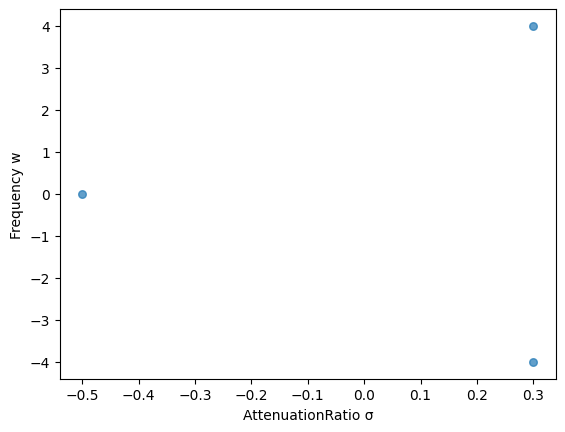

In [29]:
fig3 = plt.figure(3)
plt.scatter([np.real(wa[0]),
             np.real(wa[1]),
             np.real(wa[2])],
            [np.imag(wa[0]) / np.pi / 2,
             np.imag(wa[1]) / np.pi / 2,
             np.imag(wa[2]) / np.pi / 2],
            30,
          
            alpha=0.7)

plt.xlabel('AttenuationRatio σ')
plt.ylabel('Frequency w')
plt.show()